#1.INTRODUCTION

Nama : Kevin Nur Kurnia

Problem : Dibutuhkan Computer Vision Untuk klasifikasi jenis buah-buahan pada industri pertanian memakan waktu yang lama menggunakan manusia sehingga dibutuhkan machine learning untuk otomatis memilih dan memilah produk sayuran.

Objective : Melakukan Klasifikasi menggunakan metode CNN Deep Learning untuk otomatisasi klasifikasi jenis sayuran.

#2.IMPORT LIBRARY

In [ ]:
!pip install keras_preprocessing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


DATA LOADING

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Computer_vis_ml2

/content/drive/MyDrive/Computer_vis_ml2


In [ ]:
import os

path = "/content/drive/MyDrive/Computer_vis_ml2/Train"

DATA EXPLORATORY

In [ ]:
for filename in os.listdir(path):
    print(filename)

Carrot
Tomato
Broccoli


In [ ]:
import os
import glob

broccoli_files = glob.glob('/content/drive/MyDrive/Computer_vis_ml2/Train/Broccoli/*')
carrot_files = glob.glob('/content/drive/MyDrive/Computer_vis_ml2/Train/Carrot/*')
tomato_files = glob.glob('/content/drive/MyDrive/Computer_vis_ml2/Train/Tomato/*')

for bf in broccoli_files:
  num = bf.split('/')[-1].split('.')[0]
  os.rename(bf, f'/content/drive/MyDrive/Computer_vis_ml2/Train/Broccoli/broccoli_{num}.jpg')

for cf in carrot_files:
  num = cf.split('/')[-1].split('.')[0]
  os.rename(cf, f'/content/drive/MyDrive/Computer_vis_ml2/Train/Carrot/carrot_{num}.jpg')

for tf in tomato_files:
  num = tf.split('/')[-1].split('.')[0]
  os.rename(tf, f'/content/drive/MyDrive/Computer_vis_ml2/Train/Tomato/tomato_{num}.jpg')

In [ ]:
broccoli_files = glob.glob('/content/drive/MyDrive/Computer_vis_ml2/Train/Broccoli/*')
carrot_files = glob.glob('/content/drive/MyDrive/Computer_vis_ml2/Train/Carrot/*')
tomato_files = glob.glob('/content/drive/MyDrive/Computer_vis_ml2/Train/Tomato/*')

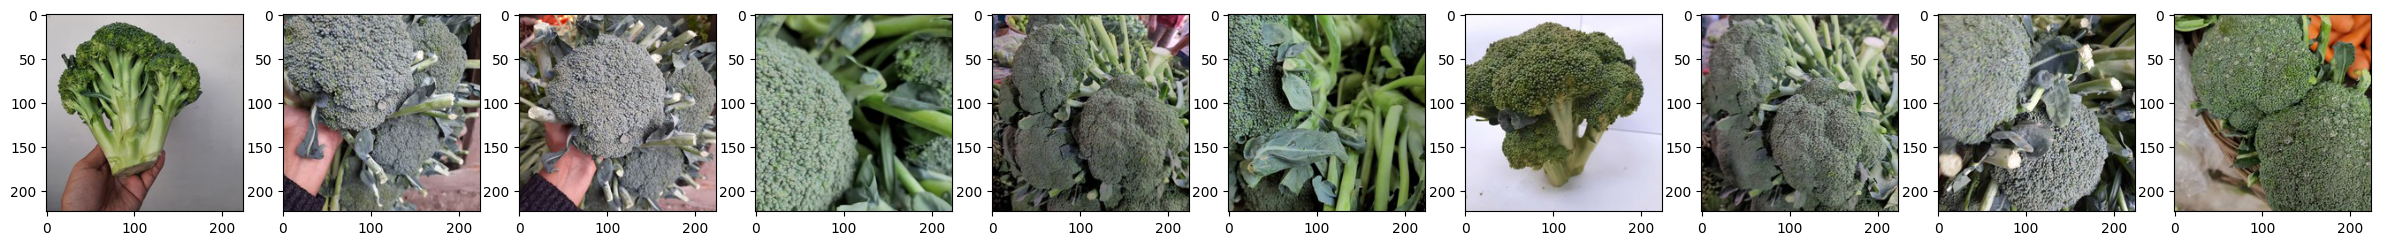

In [ ]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  broc = plt.imread(broccoli_files[i])
  ax[i].imshow(broc)

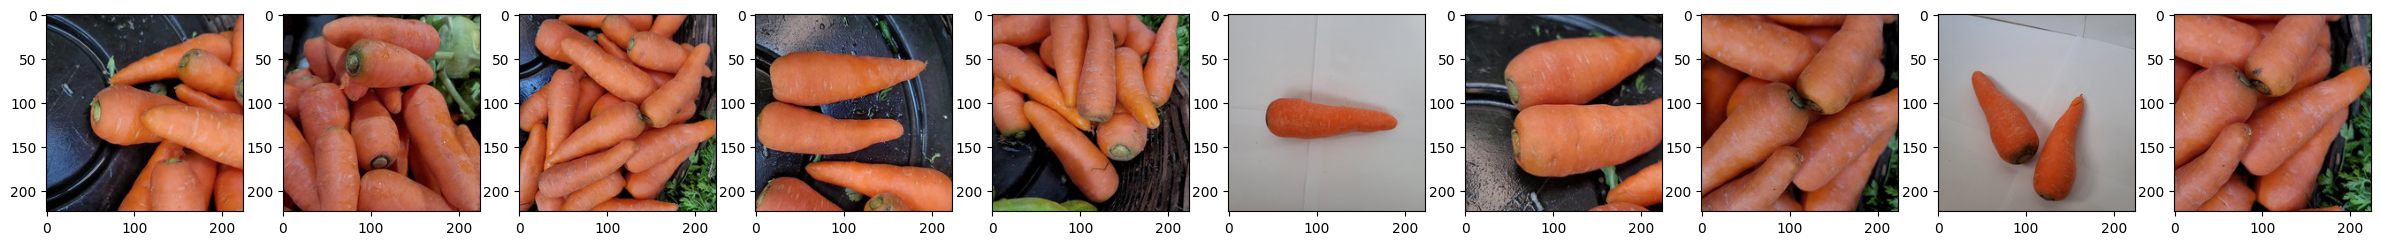

In [ ]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  carr = plt.imread(carrot_files[i])
  ax[i].imshow(carr)

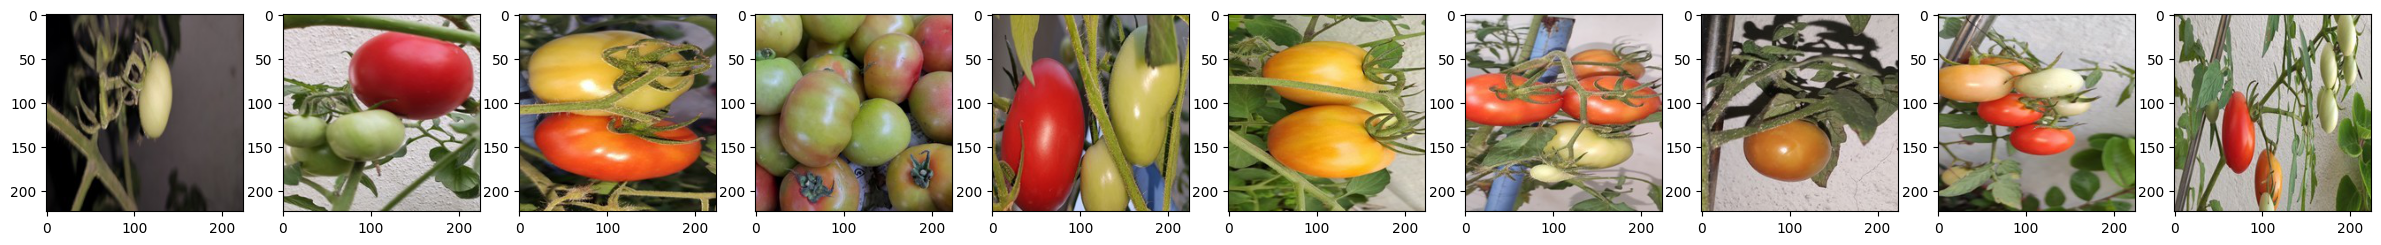

In [ ]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  tom = plt.imread(tomato_files[i])
  ax[i].imshow(tom)

DATA PREPROCESSING

Train Test Split

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_gen = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Computer_vis_ml2/Train",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)
test_gen = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Computer_vis_ml2/Test",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Checking Folder Label

In [ ]:
label_map = train_gen.class_indices
print(label_map)

file_names = train_gen.filenames
labels = train_gen.labels
print(file_names[:10])
print(labels[:10])


{'Broccoli': 0, 'Carrot': 1, 'Tomato': 2}
['Broccoli/broccoli_broccoli_broccoli_0001.jpg', 'Broccoli/broccoli_broccoli_broccoli_0002.jpg', 'Broccoli/broccoli_broccoli_broccoli_0003.jpg', 'Broccoli/broccoli_broccoli_broccoli_0004.jpg', 'Broccoli/broccoli_broccoli_broccoli_0005.jpg', 'Broccoli/broccoli_broccoli_broccoli_0006.jpg', 'Broccoli/broccoli_broccoli_broccoli_0007.jpg', 'Broccoli/broccoli_broccoli_broccoli_0008.jpg', 'Broccoli/broccoli_broccoli_broccoli_0009.jpg', 'Broccoli/broccoli_broccoli_broccoli_0010.jpg']
[0 0 0 0 0 0 0 0 0 0]


kita lihat gambar sudah sesuai dengan labelnya

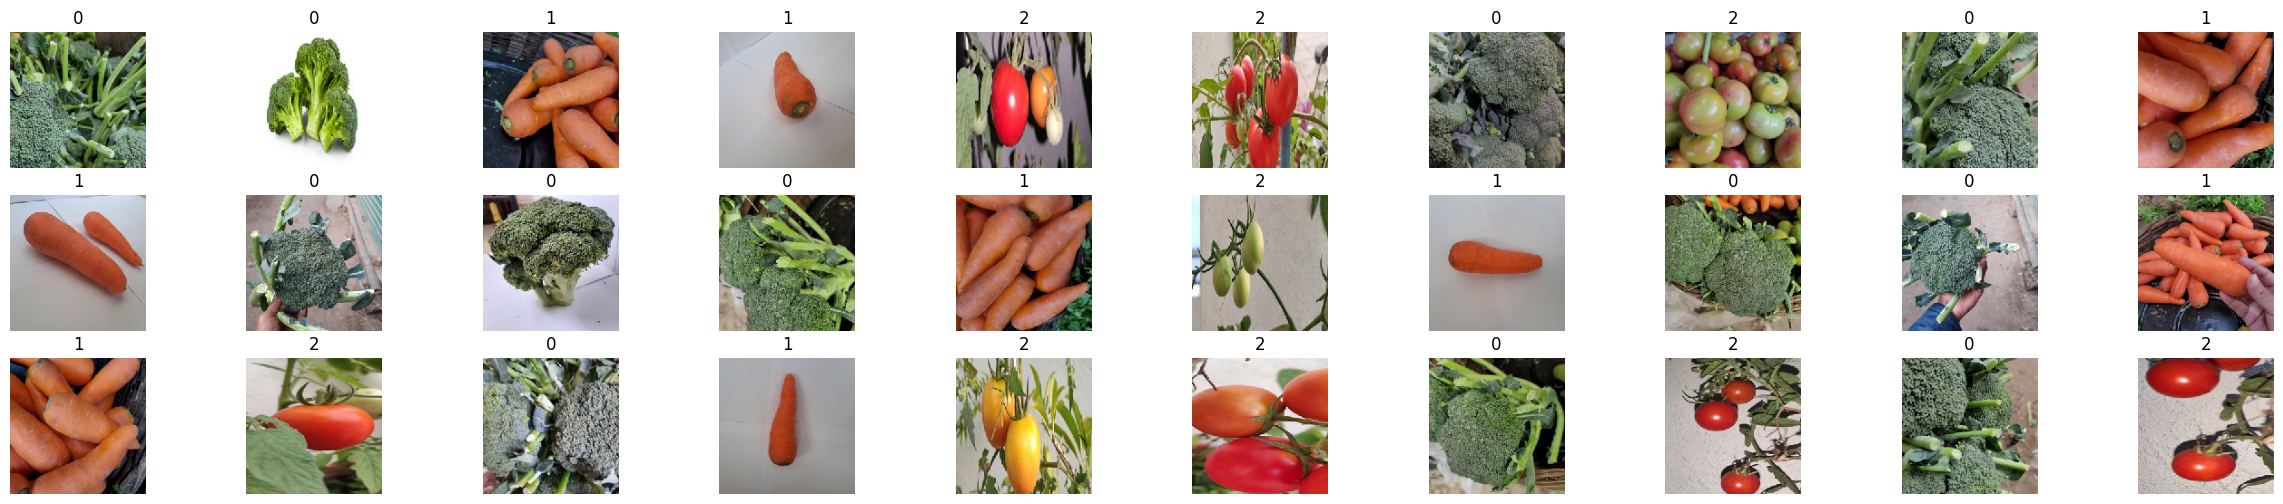

In [ ]:
plt.figure(figsize=(30, 6))
images, labels = next(train_gen)
for i in range(30):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(images[i])
    label_idx = np.argmax(labels[i])
    plt.title(label_idx)
    plt.axis('off')


Data Augmentation

Memilih Sample untuk dijadikan percontohan Augmentasi

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [ ]:
sample_image_path = "/content/drive/MyDrive/Computer_vis_ml2/Train/Tomato/tomato_tomato_tomato_0004.jpg"
print(sample_image_path)


/content/drive/MyDrive/Computer_vis_ml2/Train/Tomato/tomato_tomato_tomato_0004.jpg


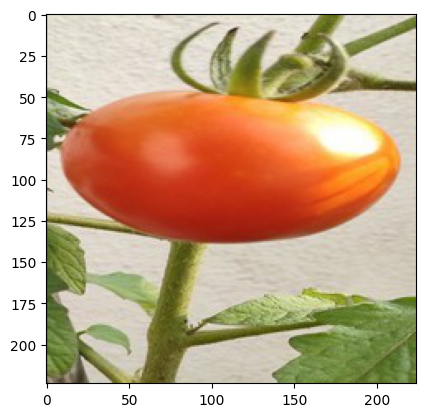

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the image using PIL
img = Image.open(sample_image_path)

# Show the image using matplotlib
plt.imshow(img)
plt.show()



Melihat bagaimana image ter augmentasi

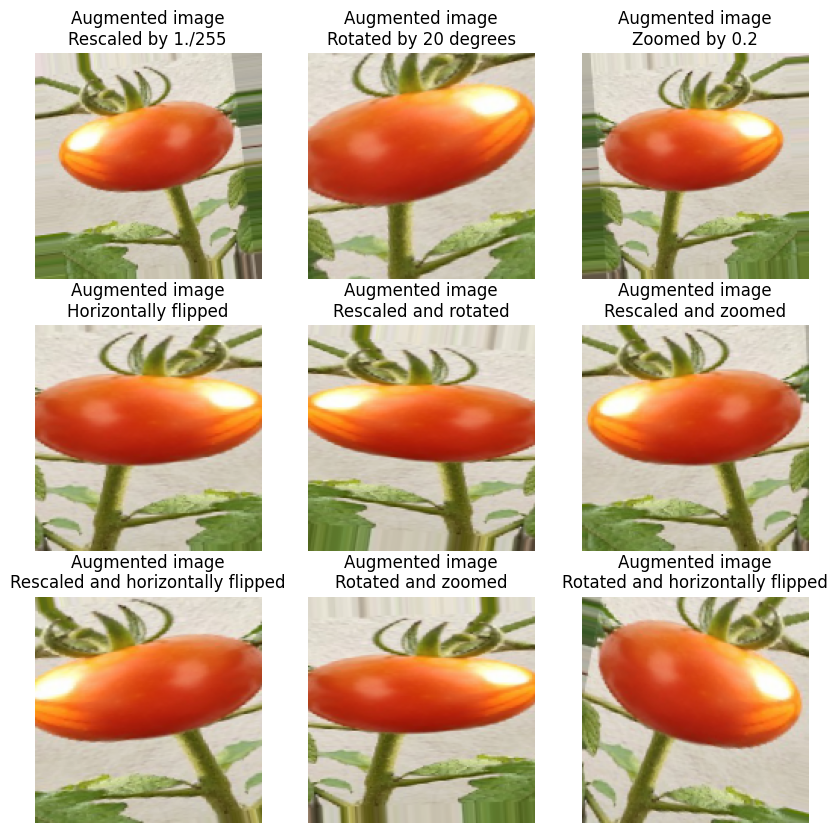

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

img_path = '/content/drive/MyDrive/Computer_vis_ml2/Train/Tomato/tomato_tomato_tomato_0004.jpg'
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
plt.figure(figsize=(10, 10))
for batch in datagen.flow(x, batch_size=1):
    i += 1
    if i > 9:
        break
    img_aug = array_to_img(batch[0])
    title = "Augmented image\n"
    if i == 1:
        title += "Rescaled by 1./255"
    elif i == 2:
        title += "Rotated by 20 degrees"
    elif i == 3:
        title += "Zoomed by 0.2"
    elif i == 4:
        title += "Horizontally flipped"
    elif i == 5:
        title += "Rescaled and rotated"
    elif i == 6:
        title += "Rescaled and zoomed"
    elif i == 7:
        title += "Rescaled and horizontally flipped"
    elif i == 8:
        title += "Rotated and zoomed"
    elif i == 9:
        title += "Rotated and horizontally flipped"
    plt.subplot(3, 3, i)
    plt.imshow(img_aug)
    plt.axis('off')
    plt.title(title)
plt.show()


Membuat data train dengan data augmentation

In [ ]:
# Adding data augmentation to the training generator
train_aug_gen = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Computer_vis_ml2/Train",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 3000 images belonging to 3 classes.


MODEL CREATION

In [ ]:
input_shape = (150, 150, 3)
num_classes = 3


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

model = Sequential()

# First convolutional layer with batch normalization
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with batch normalization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer with batch normalization and dropout
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
batch_size = 32
total_train_samples = 3000
steps_per_epoch = total_train_samples // batch_size
num_epochs = 10

In [ ]:
model.fit(
    train_aug_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=test_gen
)


Epoch 1/10
93/93 [==============================] - 896s 10s/step - loss: 0.1401 - accuracy: 0.9535 - val_loss: 2.0442 - val_accuracy: 0.4817
Epoch 2/10
93/93 [==============================] - 85s 915ms/step - loss: 0.0539 - accuracy: 0.9815 - val_loss: 2.7179 - val_accuracy: 0.4417
Epoch 3/10
93/93 [==============================] - 91s 975ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 2.4169 - val_accuracy: 0.5667
Epoch 4/10
93/93 [==============================] - 89s 953ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 1.8223 - val_accuracy: 0.4317
Epoch 5/10
93/93 [==============================] - 83s 893ms/step - loss: 0.0308 - accuracy: 0.9919 - val_loss: 0.5283 - val_accuracy: 0.7850
Epoch 6/10
93/93 [==============================] - 82s 880ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.4802 - val_accuracy: 0.8650
Epoch 7/10
93/93 [==============================] - 83s 893ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0742 - val_accuracy: 0.9767
